In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
df.shape

(768, 9)

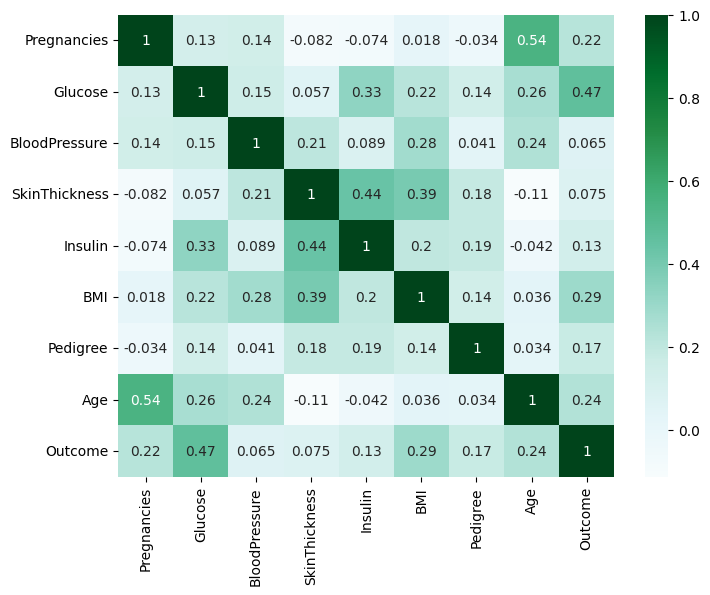

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='BuGn')
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

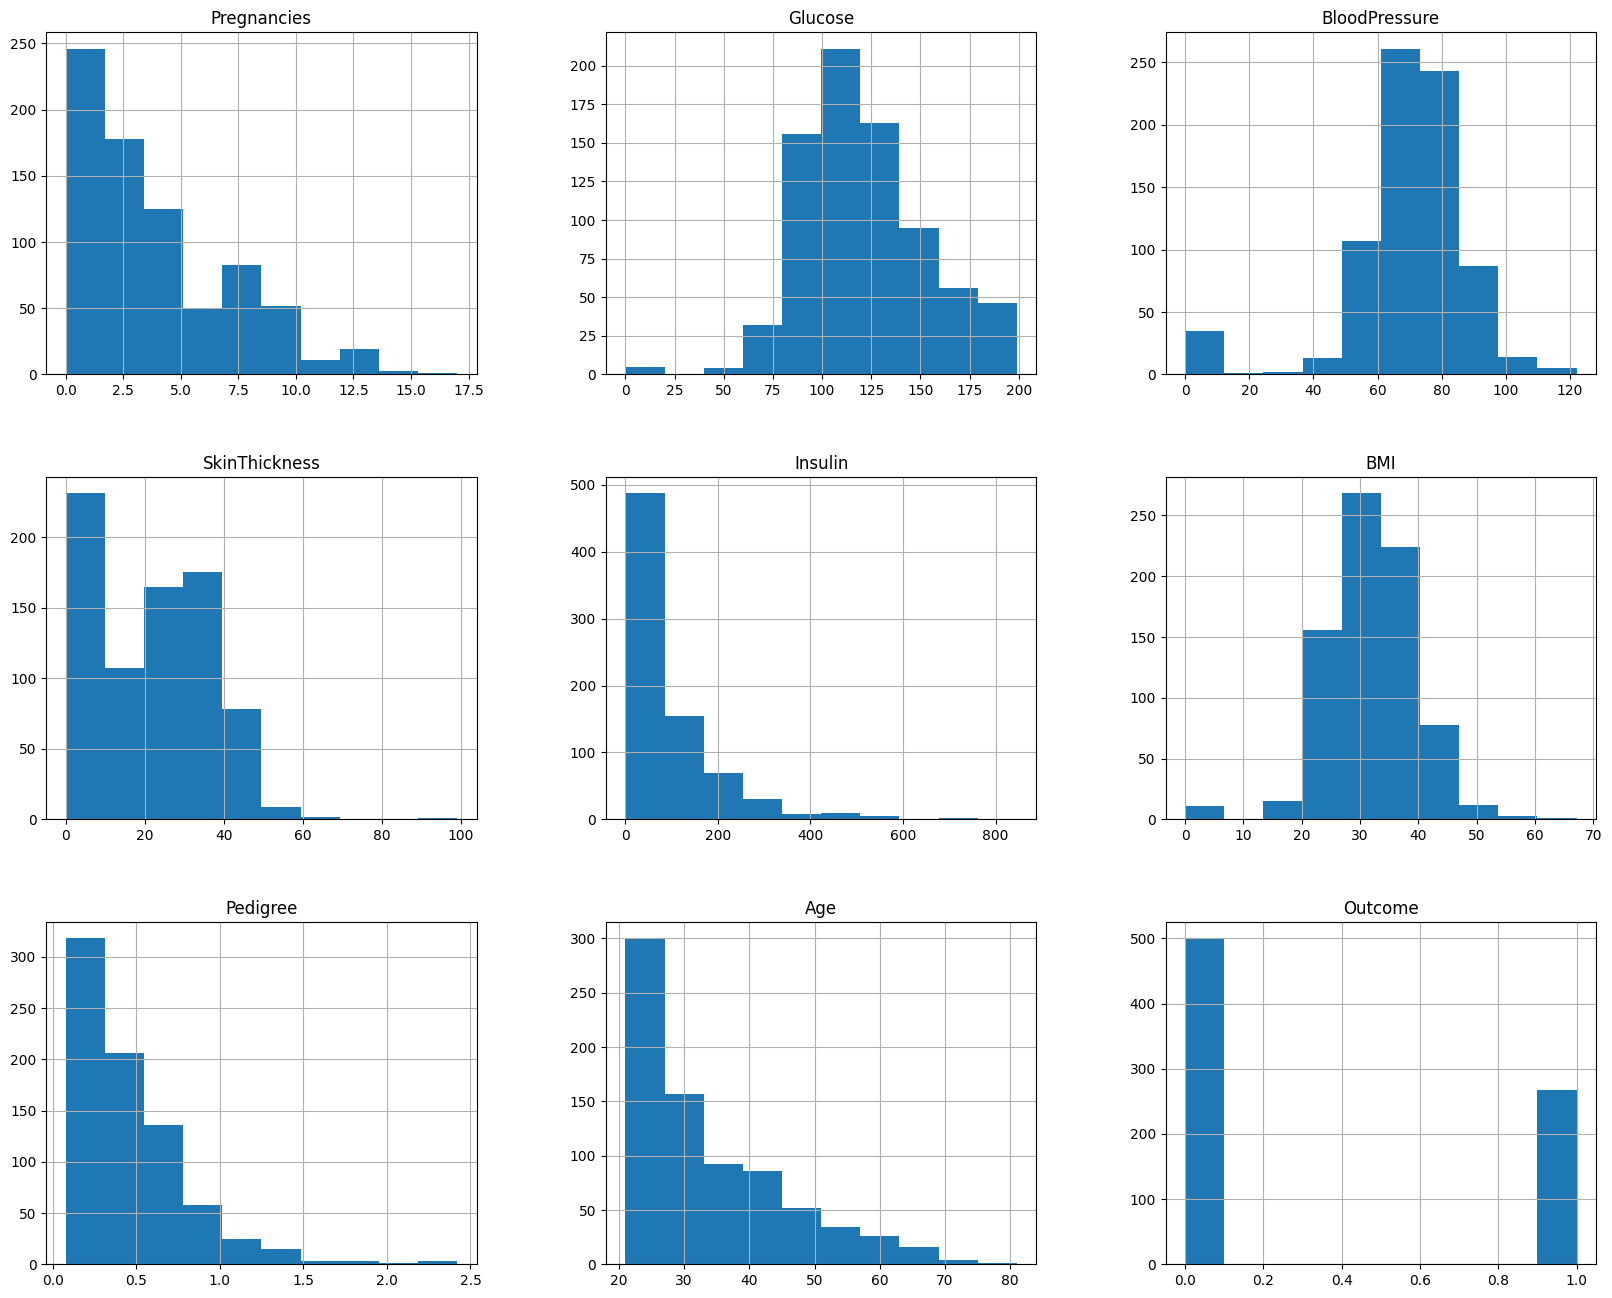

In [17]:
df.hist(figsize=(20,16))


In [21]:
x=df.iloc[:,:df.shape[1]-1]
y=df.iloc[:,-1]
print(x.shape,y.shape)

(768, 8) (768,)


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.2)

In [26]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [31]:
def knn(x_train,x_test,y_train,y_test,neighbors,power):
    model=KNeighborsClassifier(n_neighbors=neighbors,p=power)
    y_pred=model.fit(x_train,y_train).predict(x_test)
    print(f"Accuracy for KNN: \t{accuracy_score(y_test,y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f'''Confusion matrix :\n
    | Positive Prediction\t| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n''')
    cr=classification_report(y_test,y_pred)
    print("Classification report: \n",cr)
    

In [35]:
param_grid = {'n_neighbors': range(1, 51),'p': range(1, 4)}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
print(grid.fit(x_train, y_train))
print(grid.best_estimator_, grid.best_params_, grid.best_score_)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51), 'p': range(1, 4)})
KNeighborsClassifier(n_neighbors=37) {'n_neighbors': 37, 'p': 2} 0.7605757696921231


In [37]:
print(knn(x_train, x_test, y_train, y_test, grid.best_params_['n_neighbors'], grid.best_params_['p']))

Accuracy for KNN: 	0.7857142857142857
Confusion matrix :

    | Positive Prediction	| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) 93	| False Negative (FN) 9
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP) 24	| True Negative (TN) 28

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       102
           1       0.76      0.54      0.63        52

    accuracy                           0.79       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.79      0.77       154

None
